房价预测
===
[Kaggle Link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)最终成绩0.11444

# 1.分析数据

## 1.1.读入数据

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import warnings
import seaborn as sns
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from operator import itemgetter
import itertools
import xgboost as xgb
%matplotlib inline

train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
# 将train与test联合起来
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],test.loc[:,'MSSubClass':'SaleCondition']), ignore_index=True)

## 1.2.LotFrontage与LotArea

In [21]:
all_data[np.logical_not(all_data["LotFrontage"].isnull())][["LotFrontage","LotArea"]].head(10)

,LotFrontage,LotArea
0,65.0,8450
1,80.0,9600
2,68.0,11250
3,60.0,9550
4,84.0,14260
5,85.0,14115
6,75.0,10084
8,51.0,6120
9,50.0,7420
10,70.0,11200


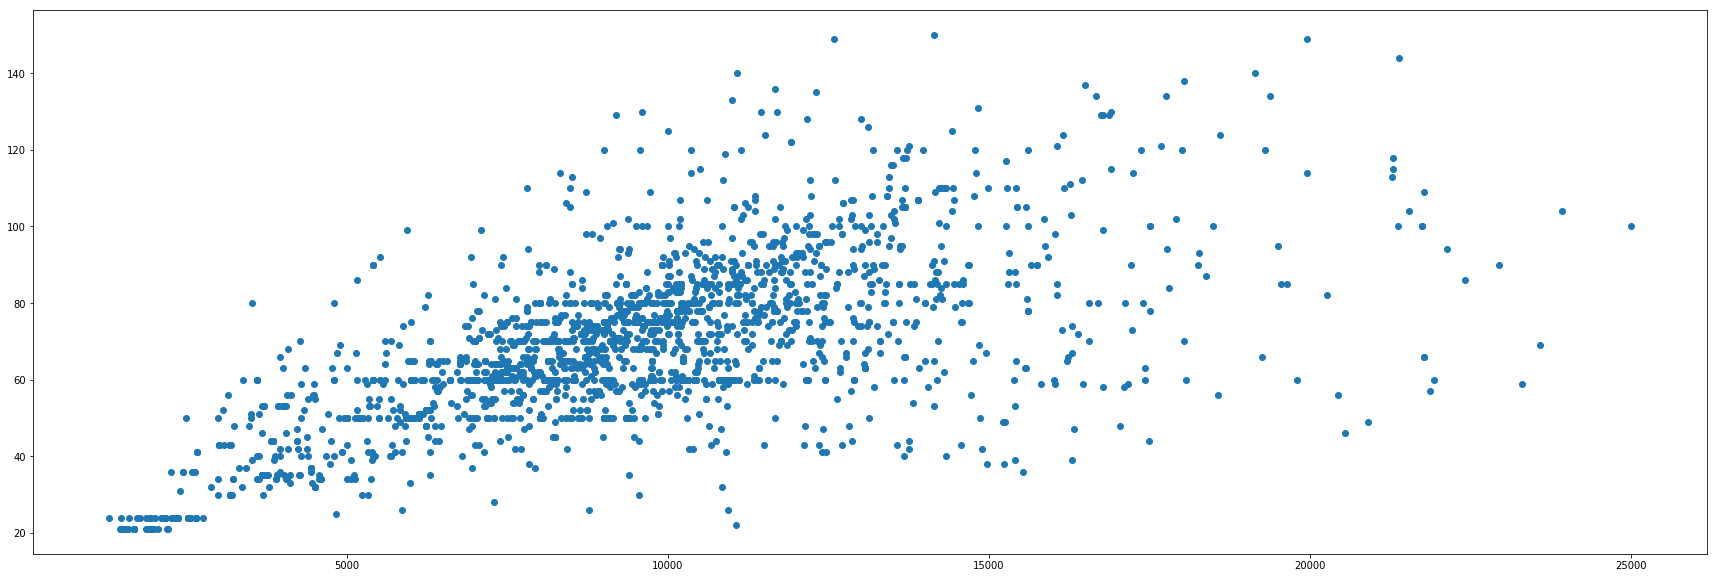

In [37]:
x = all_data.loc[np.logical_not(all_data["LotFrontage"].isnull()), "LotArea"]
y = all_data.loc[np.logical_not(all_data["LotFrontage"].isnull()), "LotFrontage"]
t = (x <= 25000) & (y <= 150)
plt.figure(facecolor='w', figsize=(30,10))
plt.scatter(x[t], y[t])

In [38]:
# 拟合LotFrontage为null的值
p = np.polyfit(x[t], y[t], 1)
all_data.loc[all_data['LotFrontage'].isnull(), 'LotFrontage'] = np.polyval(p, all_data.loc[all_data['LotFrontage'].isnull(), 'LotArea'])